# PCA y IPCA

## Librerias

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Datos a trabajar

In [4]:
df_hearth = pd.read_csv('/root/Platzi/Cur_M_L_SKlearn/data/heart_bde64b4c-2d72-4cd3-a964-62ee94855f5b.csv')

In [6]:
df_features = df_hearth.drop(['target'], axis=1)
df_target = df_hearth['target']

df_features = StandardScaler().fit_transform(df_features)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

## PCA

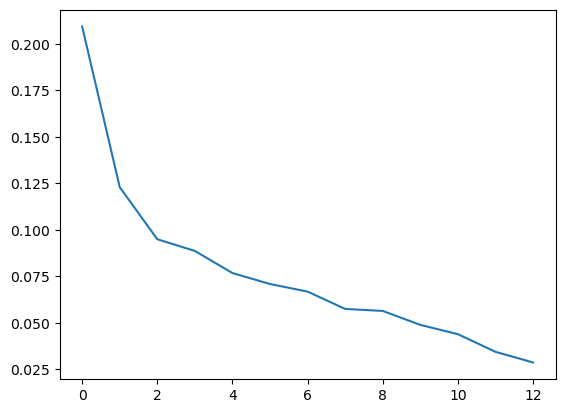

In [13]:
plt.plot(range(len(PCA(n_components=13).fit(X_train).explained_variance_)), PCA(n_components=13).fit(X_train).explained_variance_ratio_)

la variable 1 aporta mas del 20% de la varianza, la 2 el 12.5%, la 3 el 10%, la 4 el 8.5% mas o menos. Podemos tomar las primeras 4

In [15]:
pca = PCA(n_components=4)
pca.fit(X_train)

PCA(n_components=4)

In [21]:
logistic = LogisticRegression(solver='lbfgs')

In [22]:
df_train = pca.transform(X_train)
df_test = pca.transform(X_test)
logistic.fit(df_train, y_train)
print(logistic.score(df_test, y_test))

0.8214285714285714


## IPCA

In [9]:
IncrementalPCA(n_components=3, batch_size=10).fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

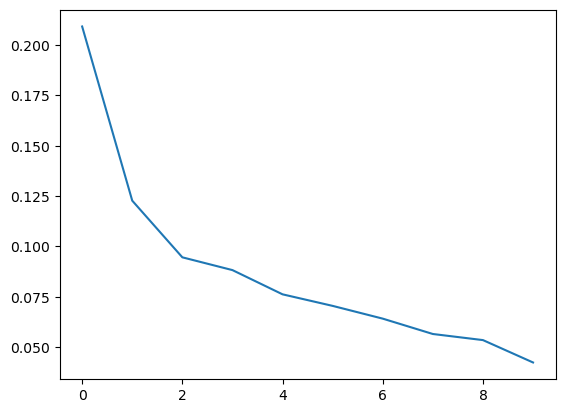

In [20]:
plt.plot(range(len(IncrementalPCA(n_components=10, batch_size=13).fit(X_train).explained_variance_)), IncrementalPCA(n_components=10, batch_size=10).fit(X_train).explained_variance_ratio_)

Vamos a tomar las primeras 4 componentes

In [ ]:
ipca = IncrementalPCA(n_components=4, batch_size=10)

In [23]:
df_train = ipca.transform(X_train)
df_test = ipca.transform(X_test)
logistic.fit(df_train, y_train)
print(logistic.score(df_test, y_test))

0.8051948051948052


## KPCA

![1](/root/Platzi/Cur_M_L_SKlearn/images/1.png)
![2](/root/Platzi/Cur_M_L_SKlearn/images/2.png)
![3](/root/Platzi/Cur_M_L_SKlearn/images/3.png)

In [25]:
from sklearn.decomposition import KernelPCA

In [26]:
kpca = KernelPCA(n_components=4, kernel='poly')

In [27]:
df_train = kpca.fit_transform(X_train)
df_test = kpca.transform(X_test)
logistic.fit(df_train, y_train)
print(logistic.score(df_test, y_test))

0.7987012987012987
